## Linear Models, Regression and Time Series

This notebook covers concepts covered in Topic 3

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


E.T.L

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
df = pd.read_csv('grades.csv')

In [ ]:
df.shape

(1000, 3)

In [ ]:
df.head()

,Student ID,Hours Studied,Grade
0,#25074,39,58.50
1,#25083,21,35.00
2,#25130,33,90.51
3,#25221,25,37.50
4,#25257,27,63.79


In [ ]:
del df['Student ID']

In [ ]:
df.describe()

,Hours Studied,Grade
count,1000.00000,1000.000000
mean,27.84000,60.978750
std,7.53121,20.435529
min,15.00000,20.000000
25%,21.00000,45.000000
50%,28.00000,59.100000
75%,35.00000,75.600000
max,40.00000,100.000000


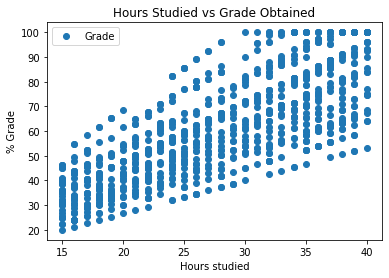

In [ ]:
df.plot(x='Hours Studied',y='Grade', style='o')
plt.title('Hours Studied vs Grade Obtained')
plt.xlabel('Hours studied')
plt.ylabel('% Grade')
plt.show()

In [ ]:
# We can check the correlation between the two

corr = df['Hours Studied'].corr(df['Grade'])
corr

0.7634104863174767

We can see there is a clear positive correlation between Hours Studied and Grade obtained.

We now split our data into features and labels - the feature here is 'Hours Studied' and the grades are data 'labels'

In [ ]:
# extract the feature & label into arrays

X = df.iloc[:, :-1].values # hours studied
y = df.iloc[:, 1].values # grade

In [ ]:
# Split data into training / test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create a model instance

model = LinearRegression()

In [ ]:
# Train the model

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 2.065254084835054
Coefficient: [2.12402036]


In [ ]:
# Make grade predictions

y_pred = model.predict(X_test)

In [ ]:
# View predcitions

df_pred = pd.DataFrame({'Actual grade:': y_test, "Predicted:": y_pred})
df_pred

,Actual grade:,Predicted:
0,92.57,87.026068
1,71.40,74.281946
2,37.80,40.297621
3,51.43,65.785865
4,89.10,72.157926
...,...,...
195,54.00,78.529987
196,51.67,67.909885
197,89.25,74.281946
198,77.14,87.026068


We need to evaluate the performance of the algorithm.  How well does it do?

1. Mean Absolute Error
2. Mean Square Error
3. Root Mean Square Error

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.412375654862403
Mean Squared Error: 158.24308544262738
Root Mean Squared Error: 12.579470793424793


In [ ]:
# 10% of the Mean Grade of All Students

df['Grade'].mean()*0.1

6.097874999999998

Given a RMSE of 13.65 is more than the 10% of the Mean Score, this model isn't great, but if we visualise the data we can see quite a wide spread from the linear model which is describing the average relationship between Hours Studied and Grade obtained.

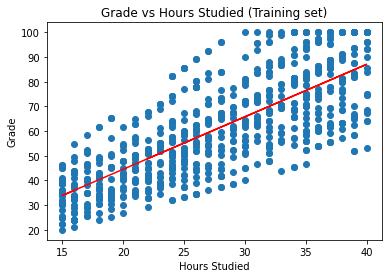

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color = "red")
plt.title("Grade vs Hours Studied (Training set)")
plt.xlabel("Hours Studied")
plt.ylabel("Grade")
plt.show()

In [ ]:
from sklearn.metrics import r2_score   
r2_score(y_test, y_pred)   
print('Adjusted R2_score:',(
    1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))

Adjusted R2_score: 0.5586249269378496


The Adjusted R2 - how much of the variability in grade is explained by number of hours studied?   About 55%

## Multiple Linear Regression

We now expand our data set to include several features, which we will map to our label - the grade.

This is more realistic of real life in which several factors influence a dependent variable.

We extend our grades dataset to include the following features:
* Number of Hours Studied
* Number of Hours Sleep the student reported having in the week prior to the exam
* The number of extention assignments the student completed
* The distance the student lives from campus

The label - Grade - remains the same.

We will now conduct a supervised machine learning analysis - in which we map the inputs (feature values) to the label (grade).  Remember we want to develop a model that captures the average relationship between the features and the label.  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving grades_multi.csv to grades_multi.csv


In [ ]:
data = pd.read_csv('grades_multi.csv')

In [ ]:
print(data.shape)
data.head()

(1000, 6)


,Student ID,Hours Studied,Hours Sleep,Number of Assignments,Distance from College,Grade
0,#25074,39,40,5,2.14,58.50
1,#25083,21,47,3,7.54,35.00
2,#25130,33,61,8,20.82,90.51
3,#25221,25,25,4,0.45,37.50
4,#25257,27,50,6,2.53,63.79


In [ ]:
# we can drop the 'Student ID' column

del data['Student ID']

In [ ]:
# Inspect our data - EDA

data.describe()

,Hours Studied,Hours Sleep,Number of Assignments,Distance from College,Grade
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,27.84000,52.098000,5.503000,4.29492,60.978750
std,7.53121,15.699199,1.902527,6.86062,20.435529
min,15.00000,21.000000,2.000000,0.02000,20.000000
25%,21.00000,40.000000,4.000000,0.86000,45.000000
50%,28.00000,50.000000,5.000000,2.11000,59.100000
75%,35.00000,63.000000,7.000000,4.68750,75.600000
max,40.00000,105.000000,10.000000,108.04000,100.000000


In [ ]:
corr = data.corr()
corr

,Hours Studied,Hours Sleep,Number of Assignments,Distance from College,Grade
Hours Studied,1.000000,-0.080297,0.738052,0.111626,0.763410
Hours Sleep,-0.080297,1.000000,0.376587,0.139683,0.394081
Number of Assignments,0.738052,0.376587,1.000000,0.186776,0.969937
Distance from College,0.111626,0.139683,0.186776,1.000000,0.200355
Grade,0.763410,0.394081,0.969937,0.200355,1.000000


Read the bottom row of the correlation matrix to get a feel for the variables with the most explanatory influence.

Notice that Distance from College shows some positive correlation - this could be random, or could be a real relationship.   We would need to test this for statitiscal significance. 

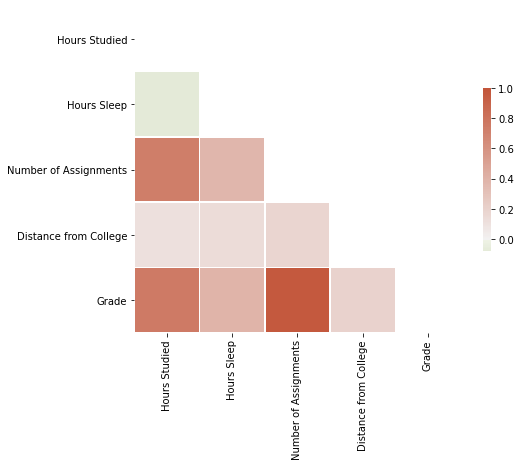

In [ ]:
# Set up the heatmap of the correlation matrix to visualize the data
import seaborn as sns

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(100, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

Look at the bottom row 'Grade' and notice which features correlate


Now we split our data into feature maps and the target output (features and labels)

In [ ]:
X = data[['Hours Studied', 'Hours Sleep', 'Number of Assignments', 'Distance from College']]
y = data['Grade']

Create a Train / Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we can train our model on our training datasets

In [ ]:
model = LinearRegression() # create an instance of LinearRegression class
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Inspect the feature co-efficients 

In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Hours Studied,0.571222
Hours Sleep,0.154067
Number of Assignments,8.132429
Distance from College,0.082505


Run the test data through the model and make a prediction - we will then compare our predictions to the actual grades in the test set to evaluate model performance

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
993,65.14,63.588189
859,99.90,97.573433
298,39.67,42.856547
553,86.40,75.860334
672,46.50,46.817601
...,...,...
679,65.33,54.686280
722,57.60,53.038503
215,22.50,23.017998
653,100.00,98.132936


By the looks of it our model is performing pretty good; we'll need to see some formal metrics...

In [ ]:
# calculate the r-squared

from sklearn.metrics import r2_score   
r2_score = r2_score(y_test, y_pred)   


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score)
print()
print('10% of the Mean of Grade:', data['Grade'].mean()*0.1)

Mean Absolute Error: 3.6137370457620817
Mean Squared Error: 20.968519194527907
Root Mean Squared Error: 4.579139569234368
R-squared: 0.9483204285127418

10% of the Mean of Grade: 6.097874999999998


If our RMSE < 10% of the Mean Score for Grades, then we have a good model.

In addition, we can see we have a high R-squared which suggests our model variables explain most of the variability in the grade - but we should be wary of spurrious correlation. 

## Time Series Example

The following code is an example of time series forecasting in Python.   You will be using time series analysis in future modules, so you are required to learn this in great depth; however work through the example as it still is an example of a linear model used for prediction.

This example uses a well-known times series dataset - Diabetic Drug Sales in Australia - as it contains several elements typical of time series data such as trend, seasonality and randomness.  

This example references the article by [Selva Prabhakaran](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)


In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120}) # set figure sizes


In [ ]:
# Import Data as Dataframe

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
                 index_col='date',parse_dates=['date'])
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [ ]:
# Explore our data set

df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


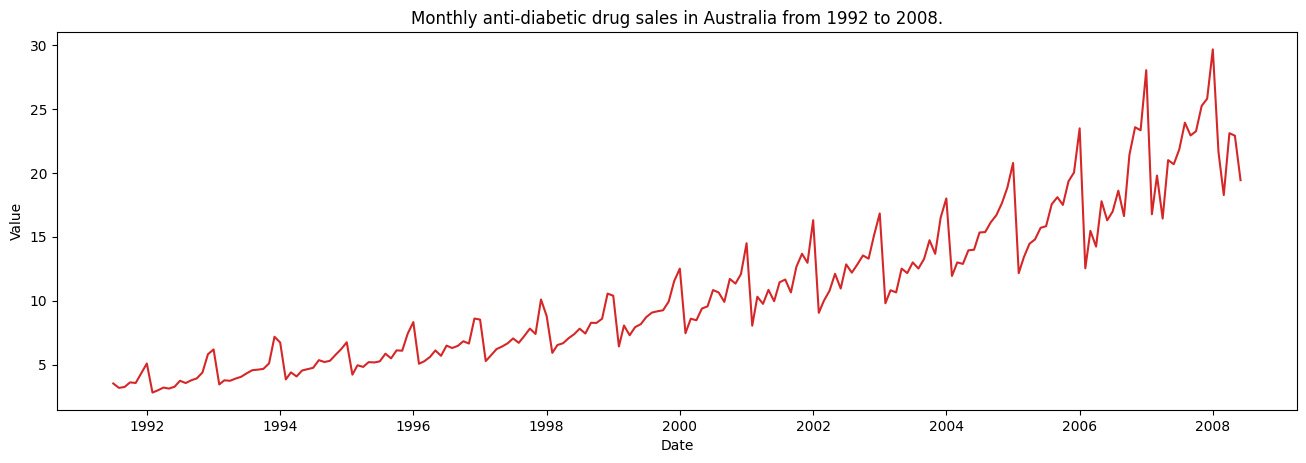

In [ ]:
# Visualise the data

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

The seasonality in the data is very clear - a sharp fall in drug sales every February, rising again in March, falling again in April etc. This pattern repeats every year - so if we were planning resource allocation we would need to take this into account.

Notice there is also a trend in the data - drug sales are increasing from one year to the next. 

One visualisation technique is the use of the [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) - which capture the level of the data as well as the distribution of the data for each period (each year in this case).

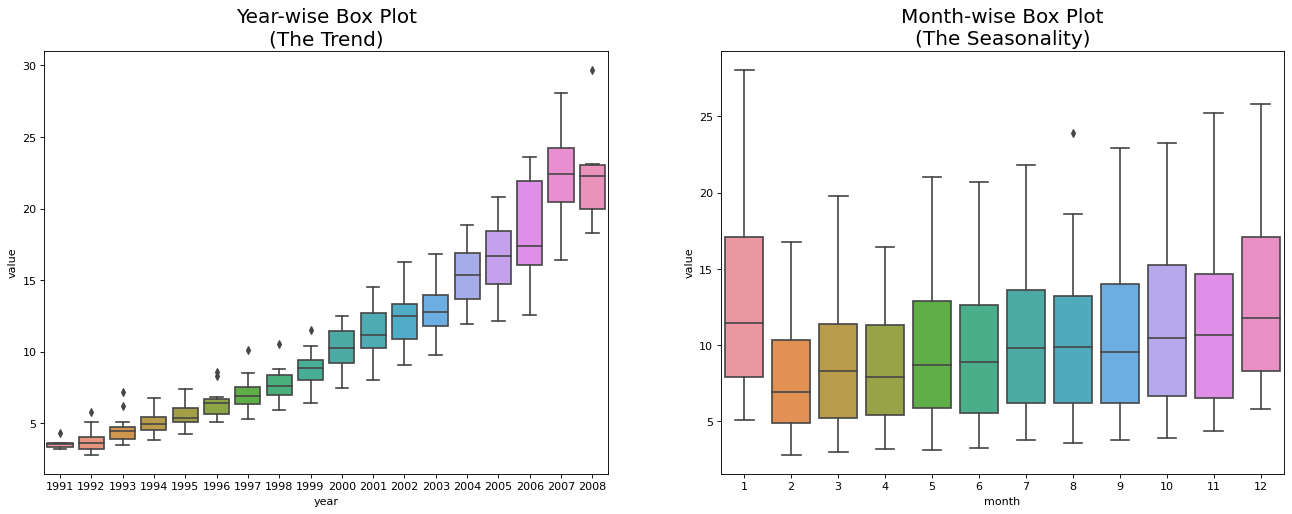

In [ ]:
# Extract the year and month from the index

df['year'] = df.index.year
df['month'] = df.index.month
years = df['year'].unique()

# Create the plot

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

The boxplots clearly show the annual and monthly distributions of the data. We can see that December and January have higher drug sales. 



A time series is split into:
* Base Level
* Trend
* Seasonality
* Error (which random and we can't predict)

A trend is observed when there is an increasing or decreasing slope in the time series. 

Seasonality is a distinct repeating pattern between regular intervals.

Not all time series must have trend and/or seasonality. 

The visuals below illustrate the compositional nature of time series...



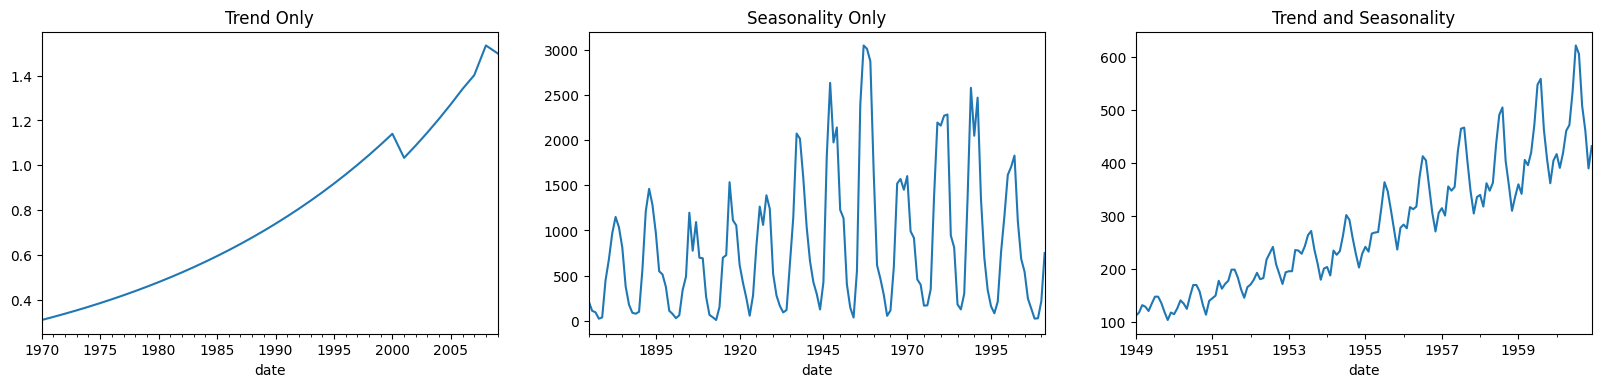

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2]);

A time series may also be cyclic. 

The data shows a repetitive pattern but in regular, fixed intervals. 

'Cyclic’ effects, such as economic growth, are not ‘seasonal’, such as ice cream sales in summer.  

As part of your exploratory data analysis it is a good idea to 'decompose' your times series into trend, seasonal and residual (error) components.

We do this by working out the trend - in annual data this is usually the 12-month moving average - and subtracting that from the data values.

This leaves the seasonal and residual components - we then calculate the seasonal component (too complex for this notebook) and remove that to leave the remaining unexplained element of the data - the error / residual. 

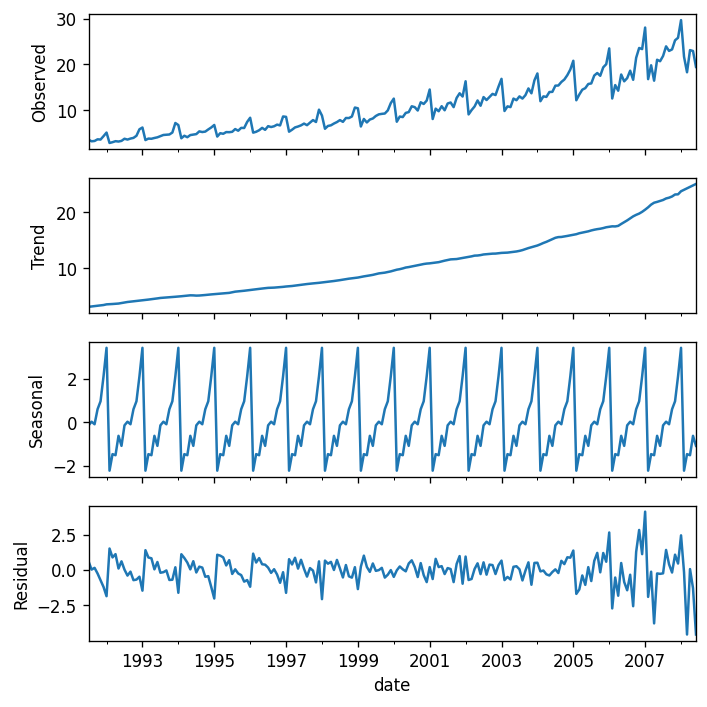

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
result_add.plot()
plt.show()

In [ ]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,-0.140765,3.060085,0.607271,3.526591
1991-08-01,0.027747,3.124765,0.028379,3.180891
1991-09-01,-0.090361,3.189445,0.153137,3.252221
1991-10-01,0.602876,3.254125,-0.245998,3.611003
1991-11-01,0.970698,3.318805,-0.723634,3.565869


If we add up the trend + seasonality + residual = actual observed value

Stationarity is an import property of a time series. 

A stationary series mean the values of the series is not a function of time - that means they do not increase or decrease in time.

In order to model any data we need to know basic statistical properties of the data - the mean and variance - and these must be stable.  If they increase or decrease through time, we can't make meaningful inferences about the data (we can but it is a lot more complicated).

The correlation of a series with its previous values - autocorrelation - must also remain constant over time. 

To make a time series stationary we need to transform it into a series with a constant mean, constant variance, no seasonality or trend.  We can then model it and make predictions before transforming it back to give us a meaningful prediction. 

In the chart below we can see a time series that is NOT stationary - there is an obvious upwards trend, and the variance is getting wider through the passage of time.  There is also obvious seasonality in the data.


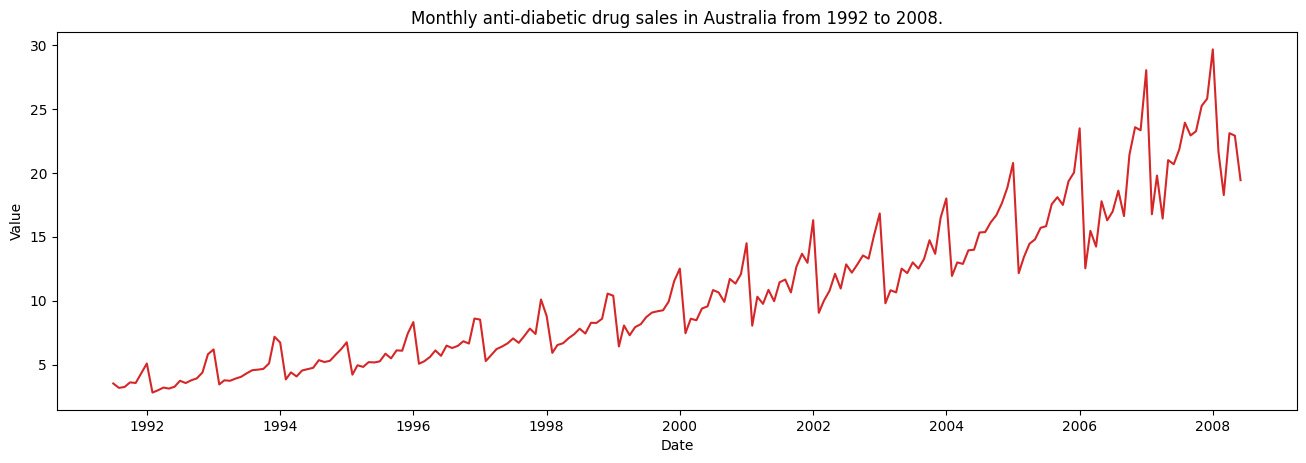

In [ ]:
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

We can transform this series into a stationary series by differencing the data - that means simply subtracting the previous value from the current value - so we are just left with the difference.  

Forecasting a stationary series is more reliable - remember autoregressive forecasting models are linear regression models of themselves.  

Linear regression works best if the predictors (X variables) are not correlated against each other. A stationary series removes the autocorrelation between the inputs (features in ML) and transforms them into independent inputs.


An example of a time series forecast model




In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 3,1,2 ARIMA Model
model = ARIMA(df.value, order=(3,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -401.521
Method:                       css-mle   S.D. of innovations              1.712
Date:                Thu, 05 Nov 2020   AIC                            817.043
Time:                        13:59:43   BIC                            840.235
Sample:                    08-01-1991   HQIC                           826.425
                         - 06-01-2008                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0979      0.028      3.545      0.000       0.044       0.152
ar.L1.D.value     1.1383      0.069     16.578      0.000       1.004       1.273
ar.L2.D.value    -0.1897      0.105     

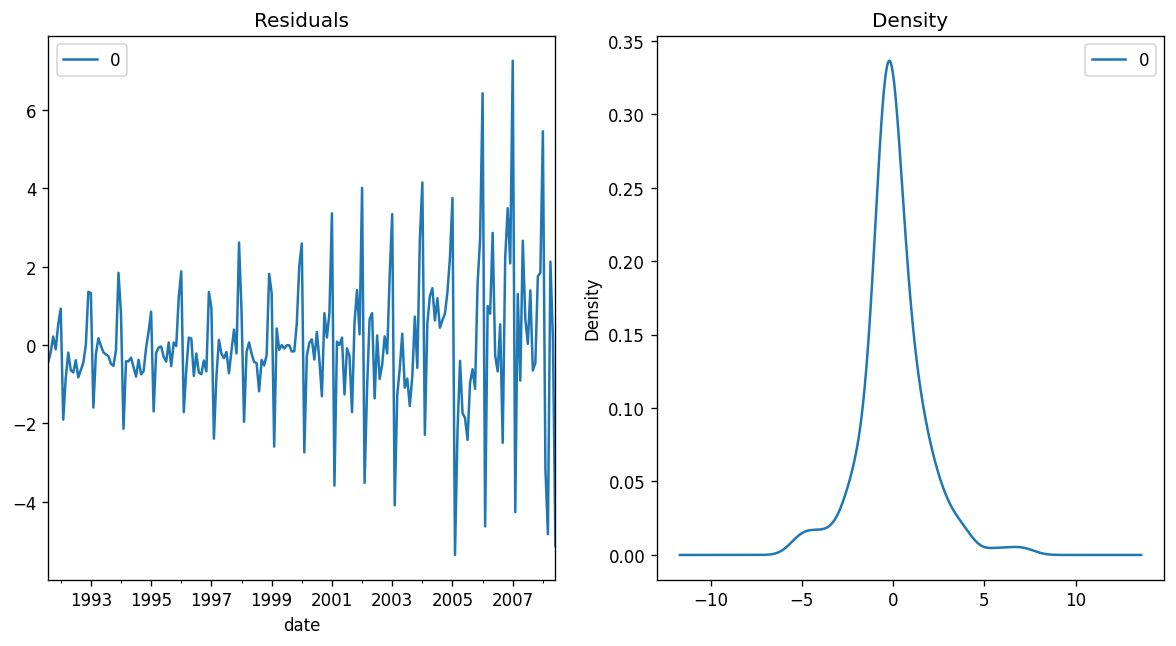

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2, figsize=(12,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


We expect our residuals - the error terms which we can't model becuase they are random, to be ditributed around a mean of zero

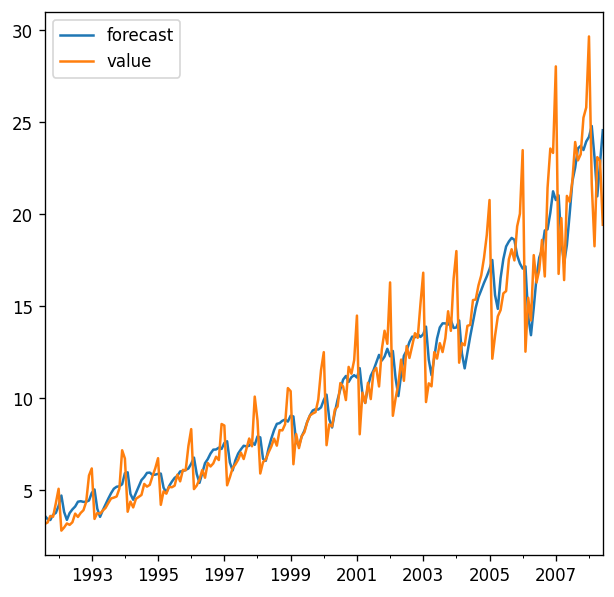

<Figure size 1440x1200 with 0 Axes>

In [ ]:
# Actual vs Fitted

model_fit.plot_predict(dynamic=False)
plt.figure(figsize=(12,10))
plt.show()

In [ ]:
# Create Training and Test
train = df.value[:189]
test = df.value[189:]

# we are only going to forecast using 15 instances of the series to set len(test) = 15

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


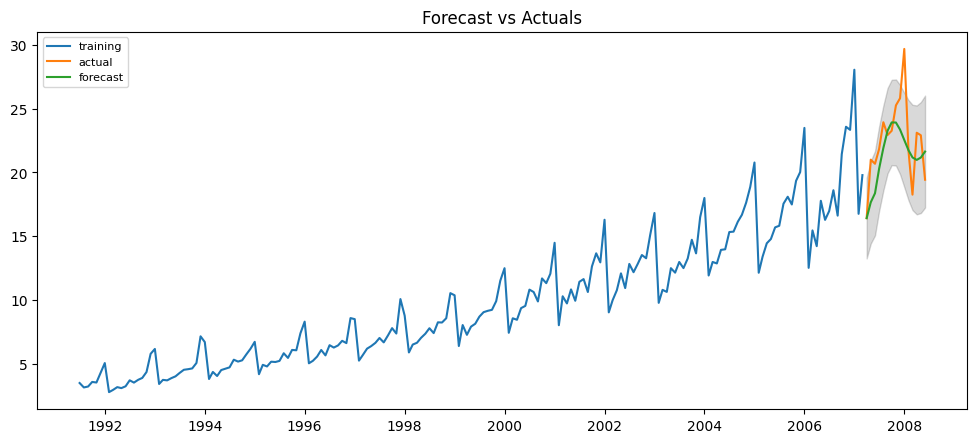

In [ ]:
# Build Model

model = ARIMA(train, order=(3, 1, 2))  

# This model lags on 3 past values, on a difference times series (once), and
# two lags on residuals for moving average
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

And we can generate the typical evaluation metrics

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


{'corr': 0.6587903643772086,
 'mae': 2.0120465467636652,
 'mape': 0.08675434135266323,
 'me': -1.18676185391853,
 'minmax': 0.08445740360108023,
 'mpe': -0.04415930003964994,
 'rmse': 2.6189103740427573}